# Ejercicio 2

a.	Transcribir el algoritmo escrito en Python a un archivo .pdf de acuerdo a los siguientes parámetros: número de partículas = 10, máximo número de iteraciones 80, coeficientes de aceleración c1 = c2 = 2, factor de inercia w = 0.5.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

class PSO:
    def __init__(self, n_particles, n_dimensions, max_iterations, c1, c2, w):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.max_iterations = max_iterations
        self.c1 = c1
        self.c2 = c2
        self.w = w
        
        self.x = np.zeros((self.n_particles, self.n_dimensions))
        self.v = np.zeros((self.n_particles, self.n_dimensions))
        self.pbest = np.zeros((self.n_particles, self.n_dimensions))
        self.pbest_fit = -np.inf * np.ones(self.n_particles)
        self.gbest = np.zeros(self.n_dimensions)
        self.gbest_fit = -np.inf
        self.gbest_array_iter = []

    def objective_function(self, x):
        return 500 * x[0] + 400 * x[1]

    def constraints(self, x):
        return (300 * x[0] + 400 * x[1] <= 127000 and
                20 * x[0] + 10 * x[1] <= 4270 and
                all(x >= 0))

    def initialize_particles(self):
        for i in range(self.n_particles):
            while True:
                self.x[i] = np.random.uniform(0, 1000, self.n_dimensions)  
                if self.constraints(self.x[i]):
                    break
            self.v[i] = np.random.uniform(-1, 1, self.n_dimensions)
            self.pbest[i] = self.x[i].copy()
            fit = self.objective_function(self.x[i])
            if fit > self.pbest_fit[i]:
                self.pbest_fit[i] = fit

    def optimize(self):
        for _ in range(self.max_iterations):
            for i in range(self.n_particles):
                fit = self.objective_function(self.x[i])
                if fit > self.pbest_fit[i] and self.constraints(self.x[i]):
                    self.pbest_fit[i] = fit
                    self.pbest[i] = self.x[i].copy()
                    if fit > self.gbest_fit:
                        self.gbest_fit = fit
                        self.gbest = self.x[i].copy()

                self.v[i] = (self.w * self.v[i] +
                              self.c1 * np.random.rand() * (self.pbest[i] - self.x[i]) +
                              self.c2 * np.random.rand() * (self.gbest - self.x[i]))
                self.x[i] += self.v[i]

                if not self.constraints(self.x[i]):
                    self.x[i] = self.pbest[i].copy()

            self.gbest_array_iter.append(self.gbest)

    def plot_results(self):
        iteraciones = np.arange(0, self.max_iterations)
        plt.plot(iteraciones, self.gbest_array_iter, label='gbest')
        plt.title('gbest en función de iteración')
        plt.xlabel('Iteraciones')
        plt.ylabel('gbest')
        plt.legend()
        plt.show()

Mejor solución: [ 94.41658532 238.16682936]
Valor óptimo: 142475.0244043616


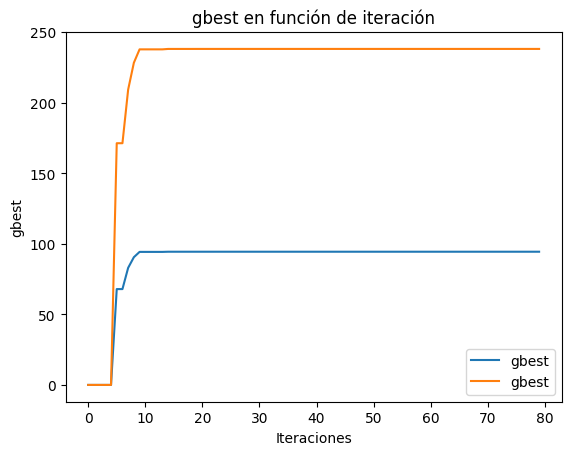

In [3]:
if __name__ == "__main__":
    n_particles = 10
    n_dimensions = 2  
    max_iterations = 80
    c1 = c2 = 2
    w = 0.5

    pso = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w)
    pso.initialize_particles()
    pso.optimize()

    print("Mejor solución:", pso.gbest)
    print("Valor óptimo:", pso.gbest_fit)

    pso.plot_results()

e.	Realizar 3 boxplots a partir de los gbest de 3 variantes de solución: i) El primer boxplot con el coeficiente de inercia constante w = 0.9, ii) El segundo boxplot con el coeficiente de inercia dinámico lineal y iii) El tercer boxplot sin coeficiente de inercia pero aplicando Factor de constricción con φ = 5. 

In [5]:
import numpy as np
from matplotlib import pyplot as plt

class PSO:
    def __init__(self, n_particles, n_dimensions, max_iterations, c1, c2, w_func):
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.max_iterations = max_iterations
        self.c1 = c1
        self.c2 = c2
        self.w_func = w_func
        
        self.x = np.zeros((self.n_particles, self.n_dimensions))
        self.v = np.zeros((self.n_particles, self.n_dimensions))
        self.pbest = np.zeros((self.n_particles, self.n_dimensions))
        self.pbest_fit = -np.inf * np.ones(self.n_particles)
        self.gbest = np.zeros(self.n_dimensions)
        self.gbest_fit = -np.inf
        self.gbest_array_iter = []

    def objective_function(self, x):
        return 500 * x[0] + 400 * x[1]

    def constraints(self, x):
        return (300 * x[0] + 400 * x[1] <= 127000 and
                20 * x[0] + 10 * x[1] <= 4270 and
                all(x >= 0))

    def initialize_particles(self):
        for i in range(self.n_particles):
            while True:
                self.x[i] = np.random.uniform(0, 1000, self.n_dimensions)  
                if self.constraints(self.x[i]):
                    break
            self.v[i] = np.random.uniform(-1, 1, self.n_dimensions)
            self.pbest[i] = self.x[i].copy()
            fit = self.objective_function(self.x[i])
            if fit > self.pbest_fit[i]:
                self.pbest_fit[i] = fit

    def optimize(self):
        for iteration in range(self.max_iterations):
            w = self.w_func(iteration, self.max_iterations)
            for i in range(self.n_particles):
                fit = self.objective_function(self.x[i])
                if fit > self.pbest_fit[i] and self.constraints(self.x[i]):
                    self.pbest_fit[i] = fit
                    self.pbest[i] = self.x[i].copy()
                    if fit > self.gbest_fit:
                        self.gbest_fit = fit
                        self.gbest = self.x[i].copy()

                self.v[i] = (w * self.v[i] +
                              self.c1 * np.random.rand() * (self.pbest[i] - self.x[i]) +
                              self.c2 * np.random.rand() * (self.gbest - self.x[i]))
                self.x[i] += self.v[i]

                if not self.constraints(self.x[i]):
                    self.x[i] = self.pbest[i].copy()

            self.gbest_array_iter.append(self.gbest_fit)

    def plot_results(self):
        iteraciones = np.arange(0, self.max_iterations)
        plt.plot(iteraciones, self.gbest_array_iter, label='gbest')
        plt.title('gbest en función de iteración')
        plt.xlabel('Iteraciones')
        plt.ylabel('gbest')
        plt.legend()
        plt.show()

def constant_inertia_w(iteration, max_iterations):
    return 0.9

def dynamic_inertia_w(iteration, max_iterations):
    return 0.9 - (0.5 * (iteration / max_iterations))

def constriction_factor_w(iteration, max_iterations):
    phi = 5
    k = 2 / abs(2 - phi - np.sqrt(phi**2 - 4*phi))
    return k

def plot_boxplots(results):
    labels = ['Constante w=0.9', 'Dinámico', 'Factor de constricción']
    for label, result in zip(labels, results):
        print(f"{label}: {result}")
    plt.boxplot(results, labels=labels)
    plt.title('Comparación de variantes de PSO')
    plt.ylabel('gbest')
    plt.show()

Constante w=0.9: [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
Dinámico: [-inf, -inf, -inf, -inf, -inf, np.float64(18737.90585548462), np.float64(26640.92584476622), np.float64(33457.2805855216), np.float64(39293.78433229339), np.float64(44254.812517049424), np.float64(48440.68004793732), np.float64(51946.344105055934), np.float64(54860.427352535786), np.float64(58829.25674304248), np.float64(94992.33587157431), np.float64(124374.8376635064), np.float64(124374.8376635064), np.float64(124374.8376635064), np.float64(124374.8376635064), np.float64(124374.8376635

C:\Users\sevann radhak\AppData\Local\Temp\ipykernel_13692\1941053609.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=labels)
c:\Sevann\UBA\UBA-AE\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


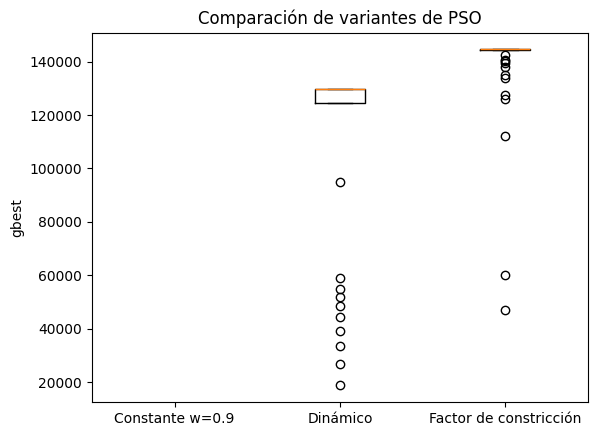

In [6]:
if __name__ == "__main__":
    n_particles = 10
    n_dimensions = 2  
    max_iterations = 80
    c1 = c2 = 2

    results = []
    for w_func in [constant_inertia_w, dynamic_inertia_w, constriction_factor_w]:
        pso = PSO(n_particles, n_dimensions, max_iterations, c1, c2, w_func)
        pso.initialize_particles()
        pso.optimize()
        results.append(pso.gbest_array_iter)

    plot_boxplots(results)